In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px

In [40]:
df=pd.read_csv("hotel_bookings.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [42]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [43]:
df.fillna(0,inplace=True)

In [44]:
filter=(df["children"]==0) & (df["adults"]==0) & (df["babies"]==0)
df=df[~filter]

In [45]:
df["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [46]:
city= df[(df["hotel"] == "City Hotel") & (df["is_canceled"] == 0)]
resort = df[(df["hotel"] == "Resort Hotel") & (df["is_canceled"] == 0)]


In [47]:
labels=resort["country"].value_counts().index
values=resort["country"].value_counts()

In [48]:
trace=go.Pie(labels=labels,values=values,hoverinfo='label+percent',textinfo='value')


In [49]:
iplot([trace])

In [50]:
country_wise_data=df[df["is_canceled"]==0]["country"].value_counts().reset_index()
country_wise_data.columns=['country','No of guests']

In [51]:
country_wise_data

,country,No of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,DMA,1
162,BDI,1
163,BFA,1
164,BHR,1


In [52]:
# show on map
map_guest = px.choropleth(country_wise_data,
                    locations=country_wise_data['country'],
                    color=country_wise_data['No of guests'], 
                    hover_name=country_wise_data['country'], 
                    title="Home country of guests")
map_guest.show()

Cost per Night

In [53]:
city_per_night=city["adr"].groupby(city["arrival_date_month"]).mean()
resort_per_night=resort["adr"].groupby(resort["arrival_date_month"]).mean()

In [54]:
per_night=pd.DataFrame(list(zip(pd.unique(city_per_night.index),city_per_night, resort_per_night)))
per_night.columns=["Month","city","Resort"]

In [55]:
per_night

,Month,city,Resort
0,April,111.962267,75.867816
1,August,118.674598,181.205892
2,December,88.401855,68.410104
3,February,86.520062,54.147478
4,January,82.330983,48.761125
5,July,115.818019,150.122528
6,June,117.874360,107.974850
7,March,90.658533,57.056838
8,May,120.669827,76.657558
9,November,86.946592,48.706289


In [56]:
!pip install sorted-months-weekdays
!pip install sort-dataframeby-monthorweek


In [57]:
import sort_dataframeby_monthorweek as sd

In [58]:
per_night=sd.Sort_Dataframeby_Month(df=per_night,monthcolumnname='Month')

In [59]:
per_night

,Month,city,Resort
0,January,82.330983,48.761125
1,February,86.520062,54.147478
2,March,90.658533,57.056838
3,April,111.962267,75.867816
4,May,120.669827,76.657558
5,June,117.874360,107.974850
6,July,115.818019,150.122528
7,August,118.674598,181.205892
8,September,112.776582,96.416860
9,October,102.004672,61.775449


In [60]:
px.line(per_night,x="Month",y=["city","Resort"],title="Cost of room over the year")

Market Analysis

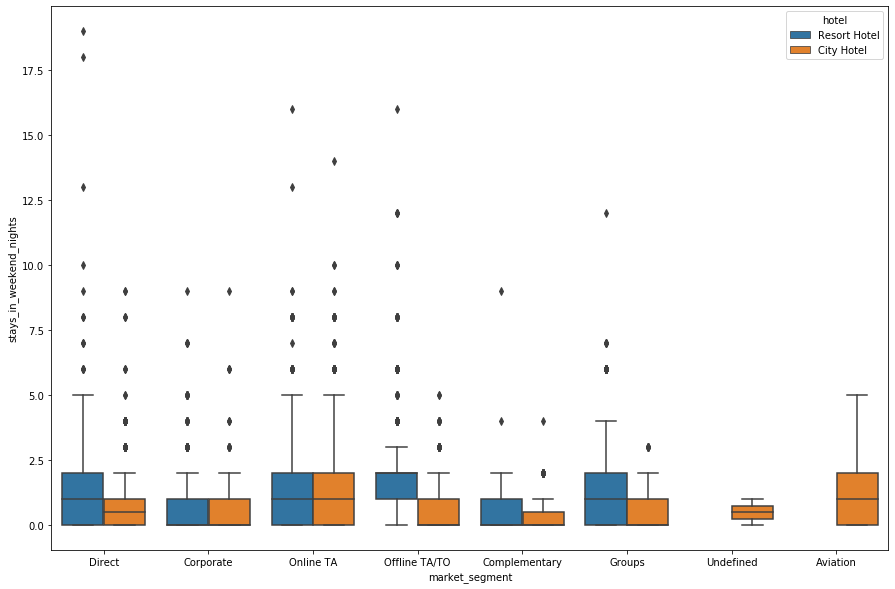

In [61]:
plt.figure(figsize=(15,10))
sns.boxplot(x='market_segment',y="stays_in_weekend_nights",data=df,hue="hotel")

Preferred meals by customer

In [62]:
px.pie(df,names=df["meal"].value_counts().index,values=df["meal"].value_counts())
#px.pie(data,names=data['meal'].value_counts().index,values=data['meal'].value_counts().values,hole=0.5)

Customer with special request

In [63]:
special_request=df["total_of_special_requests"].value_counts()

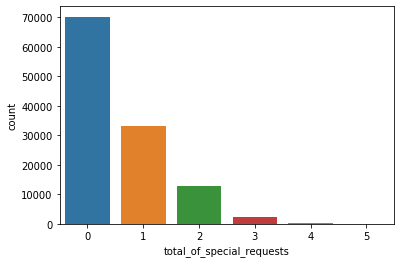

In [64]:
sns.countplot(df["total_of_special_requests"])

Reltionship between sepical request and is cancelled

In [65]:

pivot=df.groupby([ 'total_of_special_requests', 'is_canceled']).agg({'total_of_special_requests':'count'}).rename(columns={'total_of_special_requests':'count'}).unstack()
pivot

count       
is_canceled                    0      1
total_of_special_requests              
0                          36667  33534
1                          25867   7316
2                          10086   2866
3                           2049    445
4                            304     36
5                             38      2

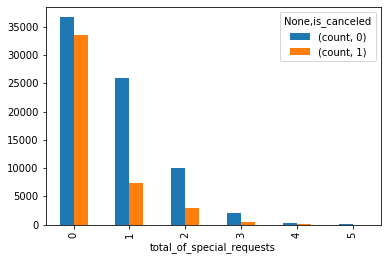

In [66]:
pivot.plot(kind='bar')

Most busy  months

In [67]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [68]:
city_per_month=city["arrival_date_month"].value_counts()
resort_per_month=resort["arrival_date_month"].value_counts()

In [72]:
per_month=pd.DataFrame(list(zip(pd.unique(city_per_month.index),city_per_month, resort_per_month)))
per_month.columns=["Month","city","Resort"]
per_month=sd.Sort_Dataframeby_Month(df=per_month,monthcolumnname='Month')

In [73]:
px.line(per_month,x="Month",y=["city","Resort"],title="Number of Guests over the year")

More About customers

How Long did the customer stay?

In [136]:
filter=df["is_canceled"]==0
clean_Data=df[filter]

In [137]:
clean_Data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [139]:
clean_Data["Total_stay"]=clean_Data["stays_in_weekend_nights"]+clean_Data["stays_in_week_nights"]

/home/akaul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [140]:
clean_Data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017,7
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017,7


In [154]:
clean_Data.groupby(['Total_stay','hotel']).agg('count').reset_index()
cleam_Data=clean_Data("hotel","is_canceled","Total_stay")

TypeError: 'DataFrame' object is not callable

In [159]:

clean_Data[["hotel","is_canceled"]

SyntaxError: unexpected EOF while parsing (<ipython-input-159-5a763c2b3fa1>, line 1)